In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import axelrod as axl

In [2]:
from collections import Counter
%matplotlib inline

In [3]:
import statsmodels.formula.api as sm

In [4]:
data =  pd.read_csv("/home/nikoleta/src/Dissertation-Notebooks/Data/Cycle/Cycle.csv") 

In [5]:
data.head(5)

,players_list,seed,parameter,player_name,player_index,degree,neighbors,neighborhood_size,ranking,scores,...,average_score,neighbors_scores,average_neighboorhood_score,R,P,S,T,clustering,connectivity,cliques
0,"[ZD-Extort-2 v2, Meta Winner Memory One, Ripof...",0,0.0,ZD-Extort-2 v2,0,2,"[1, 99]",2,98,"[483, 480, 434, 425, 455]",...,1.1375,"[[461, 418, 426, 416, 428], [828, 827, 798, 79...",621.8,3,1,0,5,0.0,2,"[[0, 1], [0, 99]]"
1,"[ZD-Extort-2 v2, Meta Winner Memory One, Ripof...",0,0.0,Meta Winner Memory One,1,2,"[0, 2]",2,10,"[461, 418, 426, 416, 428]",...,1.0650,"[[483, 480, 434, 425, 455], [779, 773, 773, 77...",614.8,3,1,0,5,0.0,2,"[[0, 1], [2, 1]]"
2,"[ZD-Extort-2 v2, Meta Winner Memory One, Ripof...",0,0.0,Ripoff,2,2,"[1, 3]",2,30,"[779, 773, 773, 773, 773]",...,1.9325,"[[461, 418, 426, 416, 428], [837, 837, 837, 83...",633.4,3,1,0,5,0.0,2,"[[2, 1], [2, 3]]"
3,"[ZD-Extort-2 v2, Meta Winner Memory One, Ripof...",0,0.0,Cycler CCCCCD,3,2,"[2, 4]",2,86,"[837, 837, 837, 837, 837]",...,2.0925,"[[779, 773, 773, 773, 773], [1439, 1439, 1439,...",1106.6,3,1,0,5,0.0,2,"[[2, 3], [3, 4]]"
4,"[ZD-Extort-2 v2, Meta Winner Memory One, Ripof...",0,0.0,Punisher,4,2,"[3, 5]",2,4,"[1439, 1439, 1439, 1439, 1439]",...,3.5975,"[[837, 837, 837, 837, 837], [970, 970, 971, 96...",903.3,3,1,0,5,0.0,2,"[[3, 4], [4, 5]]"


In [7]:
# out of the 132-ordinary players- how many played ?
ordinary_players = [s() for s in axl.ordinary_strategies]

In [8]:
num_players = len(data.player_name.unique())
num_players # all strategies played at least once

132

In [10]:
participated = data.player_name.value_counts() # how many times each player played

In [11]:
players_ranking = pd.crosstab(data.player_name, data.ranking) # players and their ranks

In [12]:
winners = players_ranking[0][players_ranking[0] != 0] # the winners

In [13]:
data.corr(method='pearson') # a simple pearson correlation table

,seed,parameter,player_index,degree,neighborhood_size,ranking,average_score,average_neighboorhood_score,R,P,S,T,clustering,connectivity
seed,1.000000,1.000000e+00,0.000000e+00,NaN,NaN,0.000000e+00,0.006301,0.009632,NaN,NaN,NaN,NaN,NaN,NaN
parameter,1.000000,1.000000e+00,-6.480798e-18,NaN,NaN,-3.176444e-18,0.006301,0.009632,NaN,NaN,NaN,NaN,NaN,NaN
player_index,0.000000,-6.480798e-18,1.000000e+00,NaN,NaN,9.499190e-03,0.009550,0.010416,NaN,NaN,NaN,NaN,NaN,NaN
degree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighborhood_size,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ranking,0.000000,-3.176444e-18,9.499190e-03,NaN,NaN,1.000000e+00,-0.014217,-0.005254,NaN,NaN,NaN,NaN,NaN,NaN
average_score,0.006301,6.301487e-03,9.550478e-03,NaN,NaN,-1.421668e-02,1.000000,-0.024438,NaN,NaN,NaN,NaN,NaN,NaN
average_neighboorhood_score,0.009632,9.631976e-03,1.041576e-02,NaN,NaN,-5.254131e-03,-0.024438,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.corr(method='spearman') # a simple spearmanS correlation table

In [ ]:
# regression 
rg= sm.ols(formula="average_score ~ degree", data=data).fit()

In [ ]:
rankings = pd.crosstab(data.player_name, data.ranking)

In [76]:
data.columns

Index(['players_list', 'seed', 'parameter', 'player_name', 'player_index',
       'degree', 'neighbors', 'neighborhood_size', 'ranking', 'scores',
       'normalised_scores', 'average_score', 'neighbors_scores',
       'average_neighboorhood_score', 'R', 'P', 'S', 'T', 'clustering',
       'connectivity', 'cliques'],
      dtype='object')

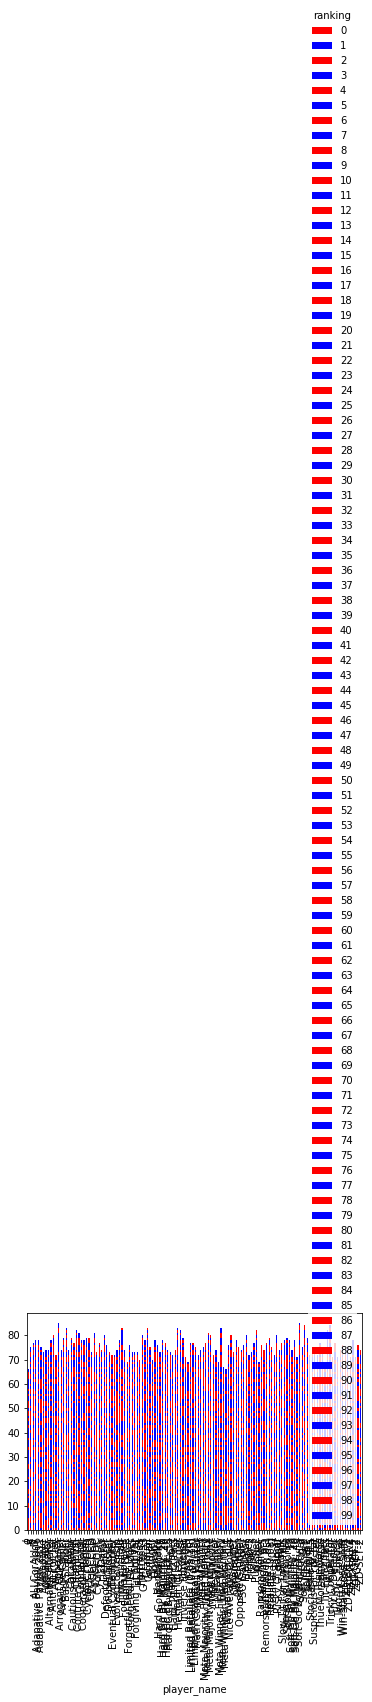

In [9]:
players_ranking.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)